---

## 📌 1) Project Description

This project focuses on building a predictive regression model to estimate car prices using the Audi dataset.  
The workflow includes:  
- Data loading and initial inspection  
- Handling missing values and duplicates  
- Outlier removal using the IQR method  
- Exploratory data analysis (EDA) with visualizations  
- Feature engineering and categorical encoding  
- Scaling numerical features  
- Model training using Linear Regression, Random Forest, and Decision Tree  
- Model evaluation and comparison using MSE, RMSE, and R² metrics  

🎯 **Goal:** Identify the best-performing model and understand the key factors influencing car prices.

---

## 🧰 2) Libraries & Environment Setup

The following Python libraries are used throughout the project:

- **pandas** – Data manipulation and analysis  
- **numpy** – Numerical computations  
- **matplotlib / seaborn** – Data visualization  
- **scikit-learn** – Machine learning models, preprocessing, and evaluation  

✅ Make sure all required libraries are installed and imported before running the notebook.

---

### **Load Libraries & Dataset**

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("audi.csv")


df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


### **Basic Info & Initial Checks**

In [ ]:

print(df.shape)         
print("#"*100)
df.info()         
print("#"*100)
df.describe()     


(10668, 9)
####################################################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
####################################################################################################


,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


### **Missing Values & Duplicates**

In [ ]:

df.isna().sum()


df = df.dropna()


df.duplicated().sum()


df = df.drop_duplicates()


### **Outlier Removal (IQR Method)**

In [ ]:


num_cols = df.select_dtypes(include=["int64", "float64"]).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |
          (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


### **Visualizations Histograms**

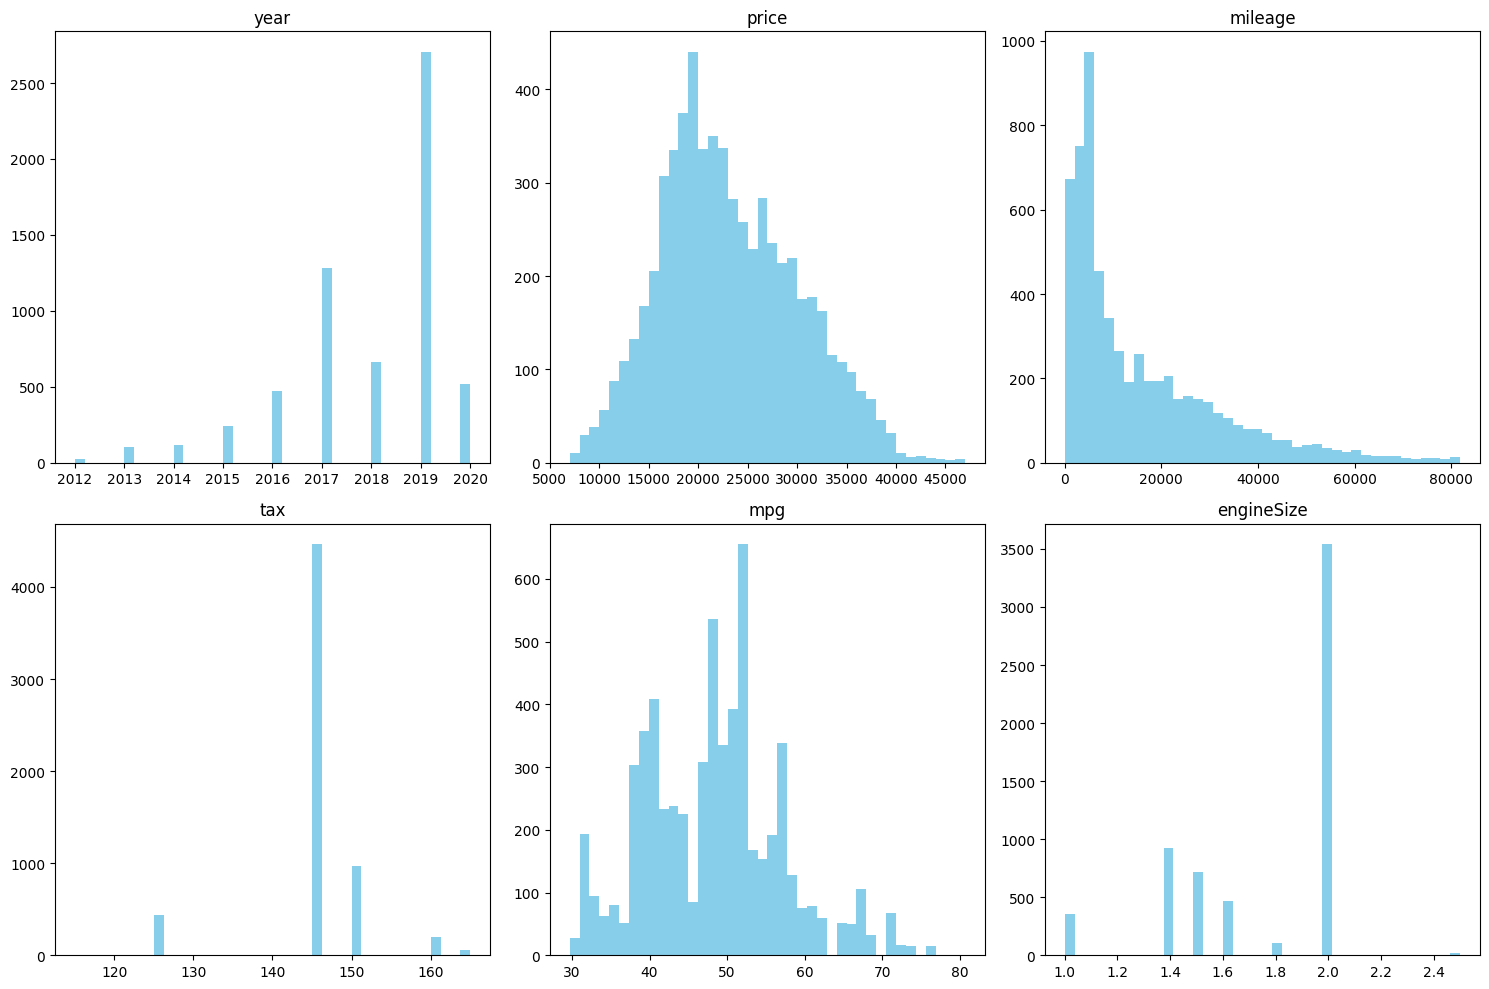

In [5]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=40, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

### **Visualizations Boxplots**

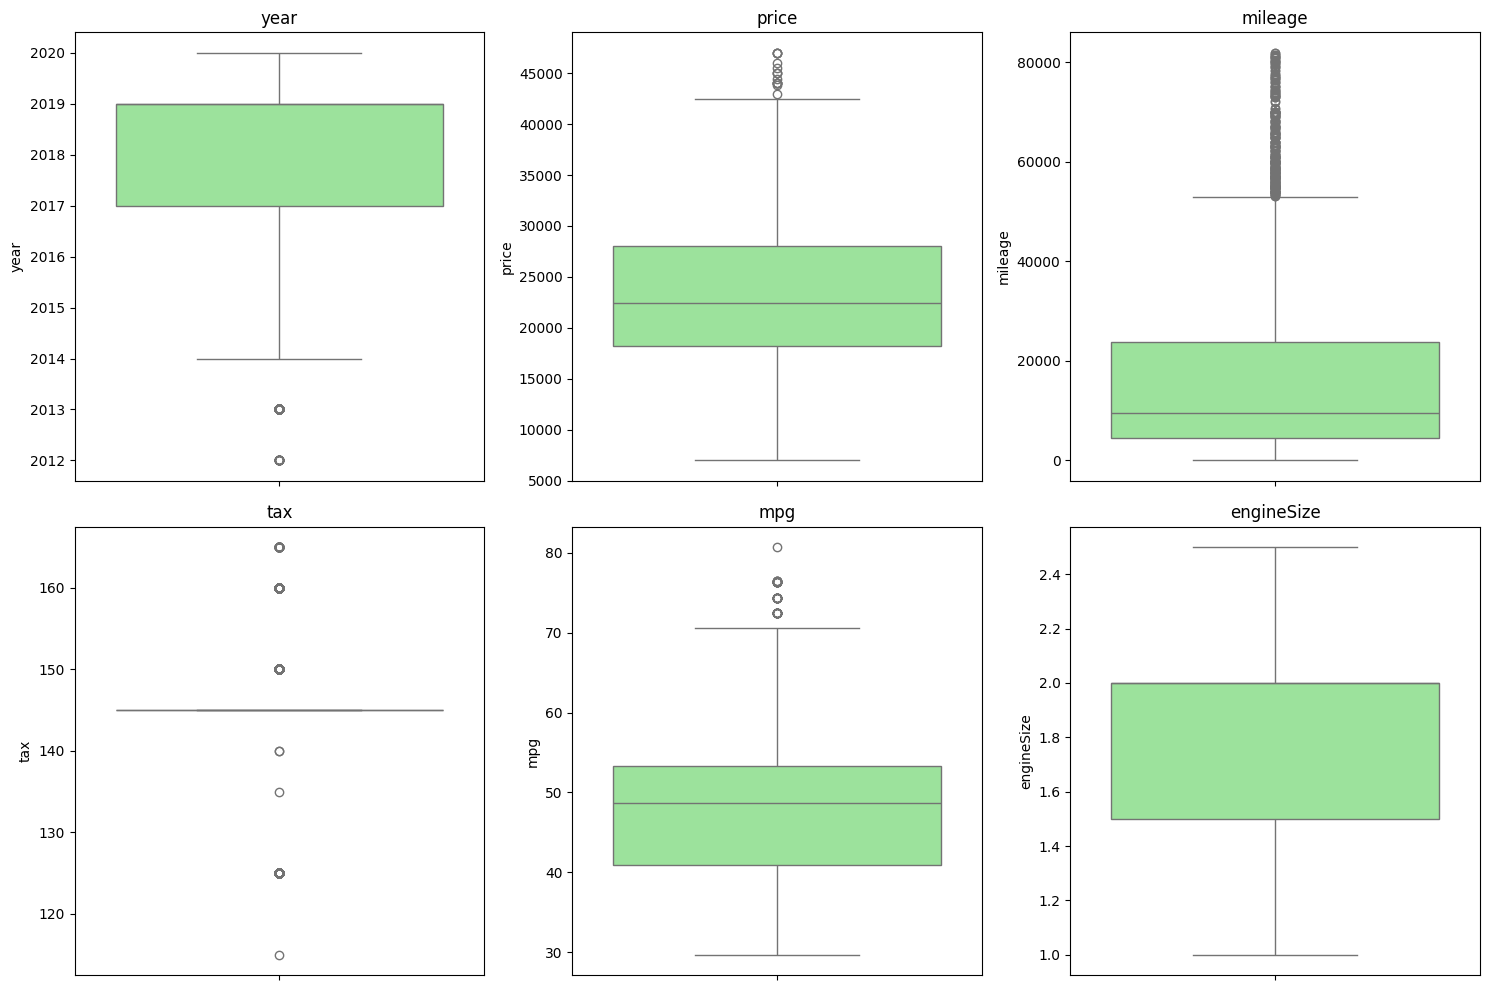

In [6]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)

plt.tight_layout()
plt.show()

### **Categorical Encoding**

In [7]:
# ===============================
# 6) Encode Categorical Variables
# ==============================

cat_cols = ["model", "transmission", "fuelType"]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


### **Log Transform Target**

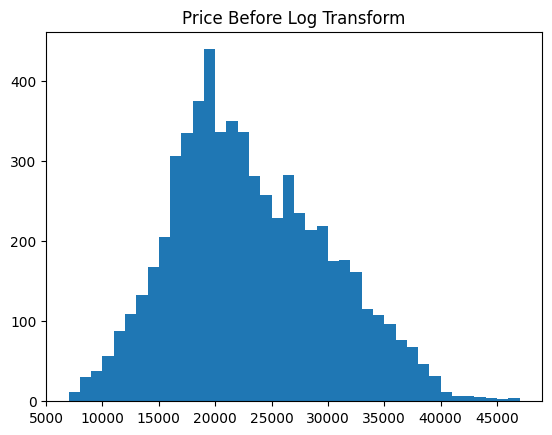

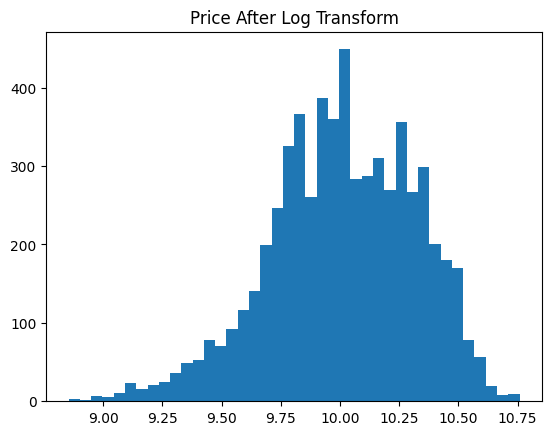

In [8]:
# ============================
# 7) Log Transform Target (price)
# ============================

plt.hist(df["price"], bins=40)
plt.title("Price Before Log Transform")
plt.show()

df["price"] = np.log1p(df["price"])

plt.hist(df["price"], bins=40)
plt.title("Price After Log Transform")
plt.show()


### **Scatterplots (Feature vs Price)**

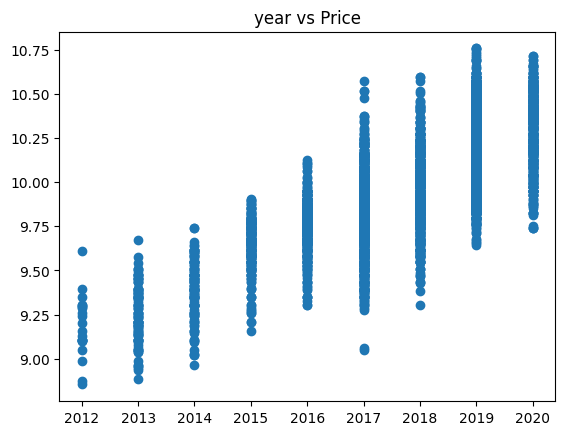

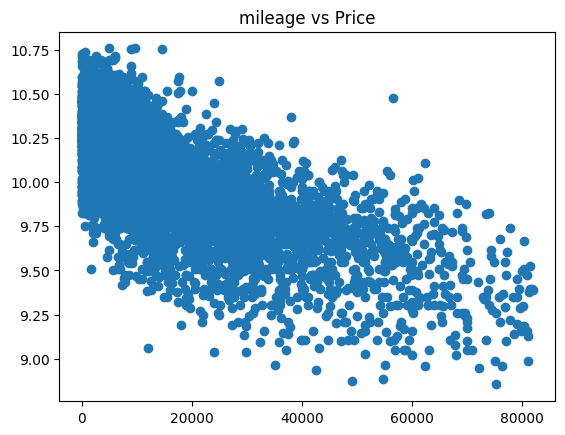

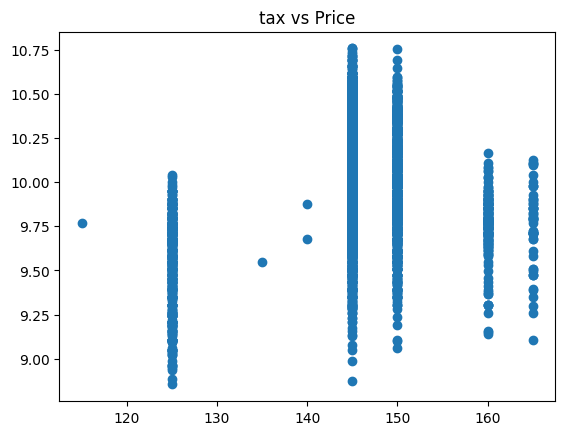

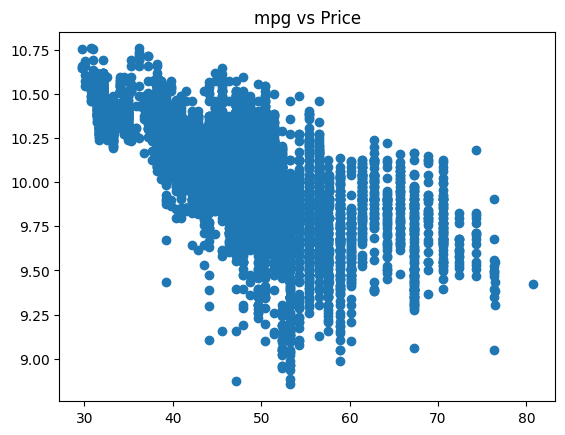

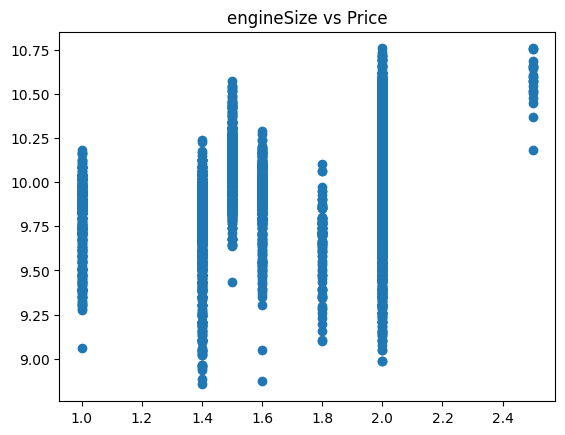

In [9]:
# ==================================
# 8) Scatterplots (Feature vs Price)
# ==================================

for col in ["year", "mileage", "tax", "mpg", "engineSize"]:
    plt.figure()
    plt.scatter(df[col], df["price"])
    plt.title(f"{col} vs Price")
    plt.show()


### **Train/Test Split**

In [10]:
# =====================
# 10) Train/Test Split
# =====================

from sklearn.model_selection import train_test_split

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### **Standardization**

In [11]:
# =================================
# 9) Standardize Numerical Features
# =================================

from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols.remove("price")  # Do NOT scale target

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


### **Linear Regression**

In [12]:
# =====================
# 11) Linear Regression
# =====================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

mse, rmse, r2


(0.009534200440191019, np.float64(0.09764323038588502), 0.8986357699480418)

### **Random Forest Regression**

In [13]:
# ============================
# 12) Random Forest Regression
# ============================

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, rmse_rf, r2_rf


(0.006419464200466896, np.float64(0.08012155889938048), 0.9317505384842318)

### **Decision Tree Regression**

In [14]:
# ============================
# 13) Decision Tree Regression
# ============================

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, rmse_dt, r2_dt


(0.0102238687016475, np.float64(0.10111314801571307), 0.8913034621418081)

### **Final Comparison Table**

In [15]:
# ============================
# 14) Final Model Comparison
# ============================

comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Decision Tree"],
    "MSE": [mse, mse_rf, mse_dt],
    "RMSE": [rmse, rmse_rf, rmse_dt],
    "R²": [r2, r2_rf, r2_dt]
})

comparison


,Model,MSE,RMSE,R²
0,Linear Regression,0.009534,0.097643,0.898636
1,Random Forest,0.006419,0.080122,0.931751
2,Decision Tree,0.010224,0.101113,0.891303
